In [2]:
def makeLine(n: int) -> list:
    edges = []
    for i in range(n - 1):
        edges.append((i, i + 1))
    return n, edges

def makeCircle(n: int) -> list:
    edges = [(n - 1, 0)]
    for i in range(n - 1):
        edges.append((i, i + 1))
    return n, edges

def makeGrid(w: int, h: int) -> list:
    edges = []
    for i in range(h):
        for j in range(w - 1):
            u = i * w + j
            v = u + 1
            edges.append((u, v))
    for j in range(w):
        for i in range(h - 1):
            u = i * w + j
            v = u + w
            edges.append((u, v))
    return w * h, edges

def makeTree(n):
    edges = []
    for i in range(1, n):
        j = (i - 1) // 2
        edges.append((j, i))
    return n, edges

In [3]:
makeGrid(2, 3)

(6, [(0, 1), (2, 3), (4, 5), (0, 2), (2, 4), (1, 3), (3, 5)])

In [4]:
from random import random
from math import sqrt
from copy import deepcopy

def dist(x):
    return sqrt(x[0] ** 2 + x[1] ** 2)

def diff(p, q):
    return [p[0] - q[0], p[1] - q[1]]

def attractiveForce(d, k):
    return d ** 2 / k

def repulsiveForce(d, k):
    return k ** 2 / d

def run(n: int, edges: list, T: int) -> list:
    # random initial coordinates
    pos = [[random(), random()] for _ in range(n)]

    # history of moves
    Pos = []
    Pos.append(deepcopy(pos))
    
    k = 1 / sqrt(n)
    v = 0.1 # initial velocity
    
    # main loop over time t
    for t in range(T):
    
        # displacements
        disp = [[0, 0] for _ in range(n)]

        # repulsion
        for i in range(n):
            for j in range(n):
                if i == j: 
                    continue
                d = diff(pos[i], pos[j])
                l = dist(d)
                disp[i][0] += d[0] / l * repulsiveForce(l, k)
                disp[i][1] += d[1] / l * repulsiveForce(l, k)
                
        # attraction
        for i, j in edges:
            d = diff(pos[i], pos[j])
            l = dist(d)
            disp[i][0] -= d[0] / l * attractiveForce(l, k)
            disp[i][1] -= d[1] / l * attractiveForce(l, k)
            disp[j][0] += d[0] / l * attractiveForce(l, k)
            disp[j][1] += d[1] / l * attractiveForce(l, k)
        
        # update positions
        for i in range(n):
            l = dist(disp[i])
            pos[i][0] += disp[i][0] / l * v
            pos[i][1] += disp[i][1] / l * v
        
        # save history
        Pos.append(deepcopy(pos))
        
        # cooling
        v *= 0.95
    
    return Pos

In [9]:
#n, E = makeGrid(3, 4)
n, E = makeTree(15)
T = 200
Pos = run(n, E, T)
print("ok")

ok


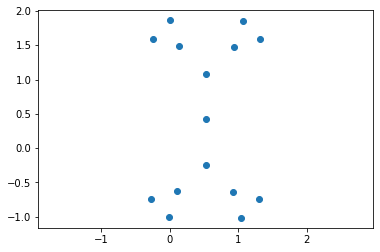

In [10]:
from matplotlib import pyplot as plt
X = [Pos[-1][i][0] for i in range(n)]
Y = [Pos[-1][i][1] for i in range(n)]

fig, ax = plt.subplots()
ax.axis('equal')
plt.plot(X, Y, "o")
plt.show()

In [11]:
rate = 10 
frames = T + 1
dt = 1 / rate 

x0, x1, y0, y1 = 0, 1, 0, 1
for t in range(T + 1):
    for i in range(n):
        x, y = Pos[t][i]
        if x < x0: x0 = x
        if x > x1: x1 = x
        if y < y0: y0 = y
        if y > y1: y1 = y

fig = plt.figure() 
ax = plt.axes(xlim = (x0, x1), ylim = (y0, y1))
ax.set_aspect('equal')
P, = plt.plot([], [], 'o', ms = 2, c = 'red')

plt.close() 

def makeframe(i):
    X = [Pos[i][j][0] for j in range(n)]
    Y = [Pos[i][j][1] for j in range(n)]
    P.set_data(X, Y)
    return P,

from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML
anim = FuncAnimation(fig, makeframe, 
                     frames = frames, 
                     interval = dt * 1000) 
HTML(anim.to_html5_video())

1